<a href="https://colab.research.google.com/github/laaksonenl/machine-learning/blob/master/red_wine_quality_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red wine quality classification

In [2]:
! pip install -q kaggle
from google.colab import files

files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d 'uciml/red-wine-quality-cortez-et-al-2009'

Saving kaggle.json to kaggle.json
  0% 0.00/25.6k [00:00<?, ?B/s]
100% 25.6k/25.6k [00:00<00:00, 45.3MB/s]


In [3]:
%%bash
mkdir -p /content/data
unzip /content/red-wine-quality-cortez-et-al-2009.zip -d /content/data/

Archive:  /content/red-wine-quality-cortez-et-al-2009.zip
  inflating: /content/data/winequality-red.csv  


In [4]:
import pandas as pd

data = pd.read_csv('/content/data/winequality-red.csv')

In [5]:
data.shape

(1599, 12)

In [6]:
from sklearn.model_selection import train_test_split

X = data.drop("quality", axis=1)
y = data["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

## Data exploration

In [7]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
711,8.9,0.565,0.34,3.0,0.093,16.0,112.0,0.99980,3.38,0.61,9.5
399,8.7,0.765,0.22,2.3,0.064,9.0,42.0,0.99630,3.10,0.55,9.4
1420,7.8,0.530,0.01,1.6,0.077,3.0,19.0,0.99500,3.16,0.46,9.8
1241,9.8,0.370,0.39,2.5,0.079,28.0,65.0,0.99729,3.16,0.59,9.8
36,7.8,0.600,0.14,2.4,0.086,3.0,15.0,0.99750,3.42,0.60,10.8


In [8]:
X_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000
mean,8.315090,0.525692,0.271587,2.538819,0.086611,15.847928,46.694683,0.996747,3.312174,0.660172,10.424173
std,1.738764,0.176479,0.193963,1.457683,0.045270,10.528751,33.549954,0.001861,0.155783,0.168029,1.051945
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000
25%,7.100000,0.390000,0.100000,1.900000,0.070000,7.000000,22.000000,0.995610,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,13.000000,38.000000,0.996700,3.310000,0.620000,10.200000
75%,9.200000,0.635000,0.425000,2.600000,0.090000,21.500000,62.000000,0.997800,3.400000,0.730000,11.100000
max,15.600000,1.580000,0.790000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,1.980000,14.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


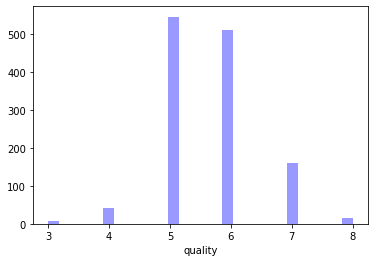

In [9]:
import seaborn as sns

sns.distplot(y_train, kde=False, color='blue')


In [10]:
y_train.value_counts()

5    545
6    510
7    159
4     42
8     15
3      8
Name: quality, dtype: int64

In [19]:
combined = pd.concat([X_train, y_train], axis=1)

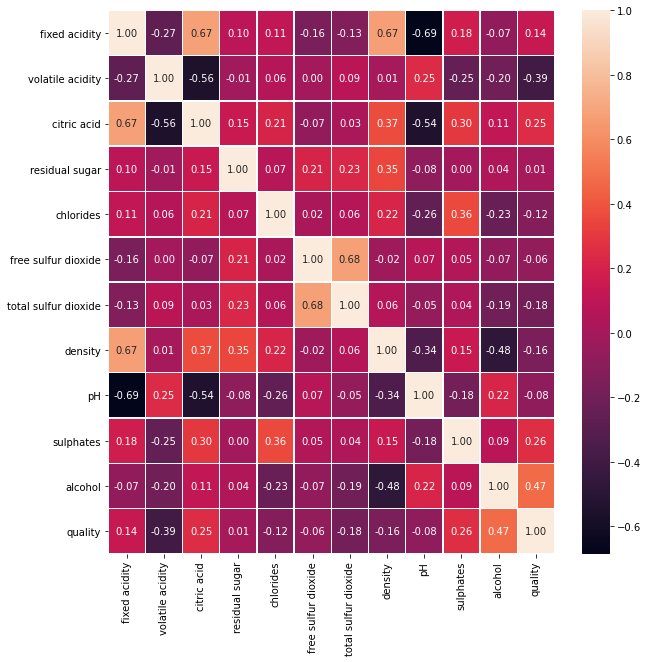

In [12]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots(figsize = (10,10))

sns.heatmap(combined.corr(), annot = True, linewidths=.5, fmt = ".2f", ax=axes)
plt.show()

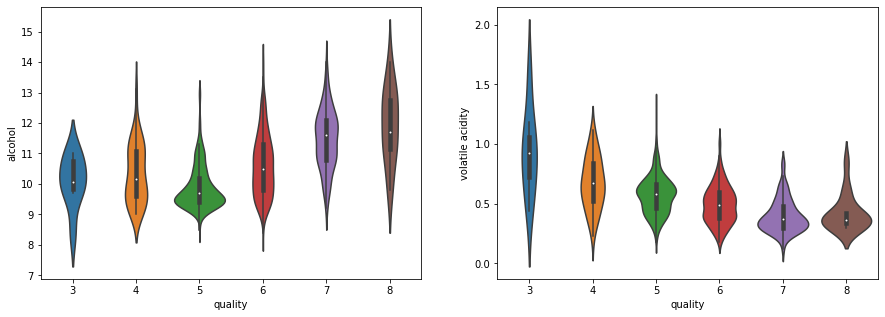

In [13]:
fig, axes = plt.subplots(1, 2, figsize =(15,5))

def violin(feature, ax):
  sns.violinplot(x='quality',
                 y=feature,
                 sizes=(10, 200),
                 data=combined,
                 ax=ax)

violin('alcohol', axes[0])
violin('volatile acidity', axes[1])

Since standard coefficient correlation captures only linear correlations, plot the pairs to detect nonlinear correlations.


In [22]:
combined['quality'].value_counts()

5    545
6    510
7    159
4     42
8     15
3      8
Name: quality, dtype: int64

In [103]:
x = combined.groupby(pd.cut(combined['quality'], bins=[1, 3, 7, 10]))
bin_keys = x.groups.keys()
labels = { 1: 'Bad', 2: 'Mediocre', 3: 'Good' }

tmp = combined.copy()
for i, b in enumerate(bins, 1):
  idx = x.groups.get(b)
  tmp.loc[idx, 'quality'] = labels[i]

tmp.head()
tmp['quality'].value_counts()

Mediocre    1256
Good          15
Bad            8
Name: quality, dtype: int64

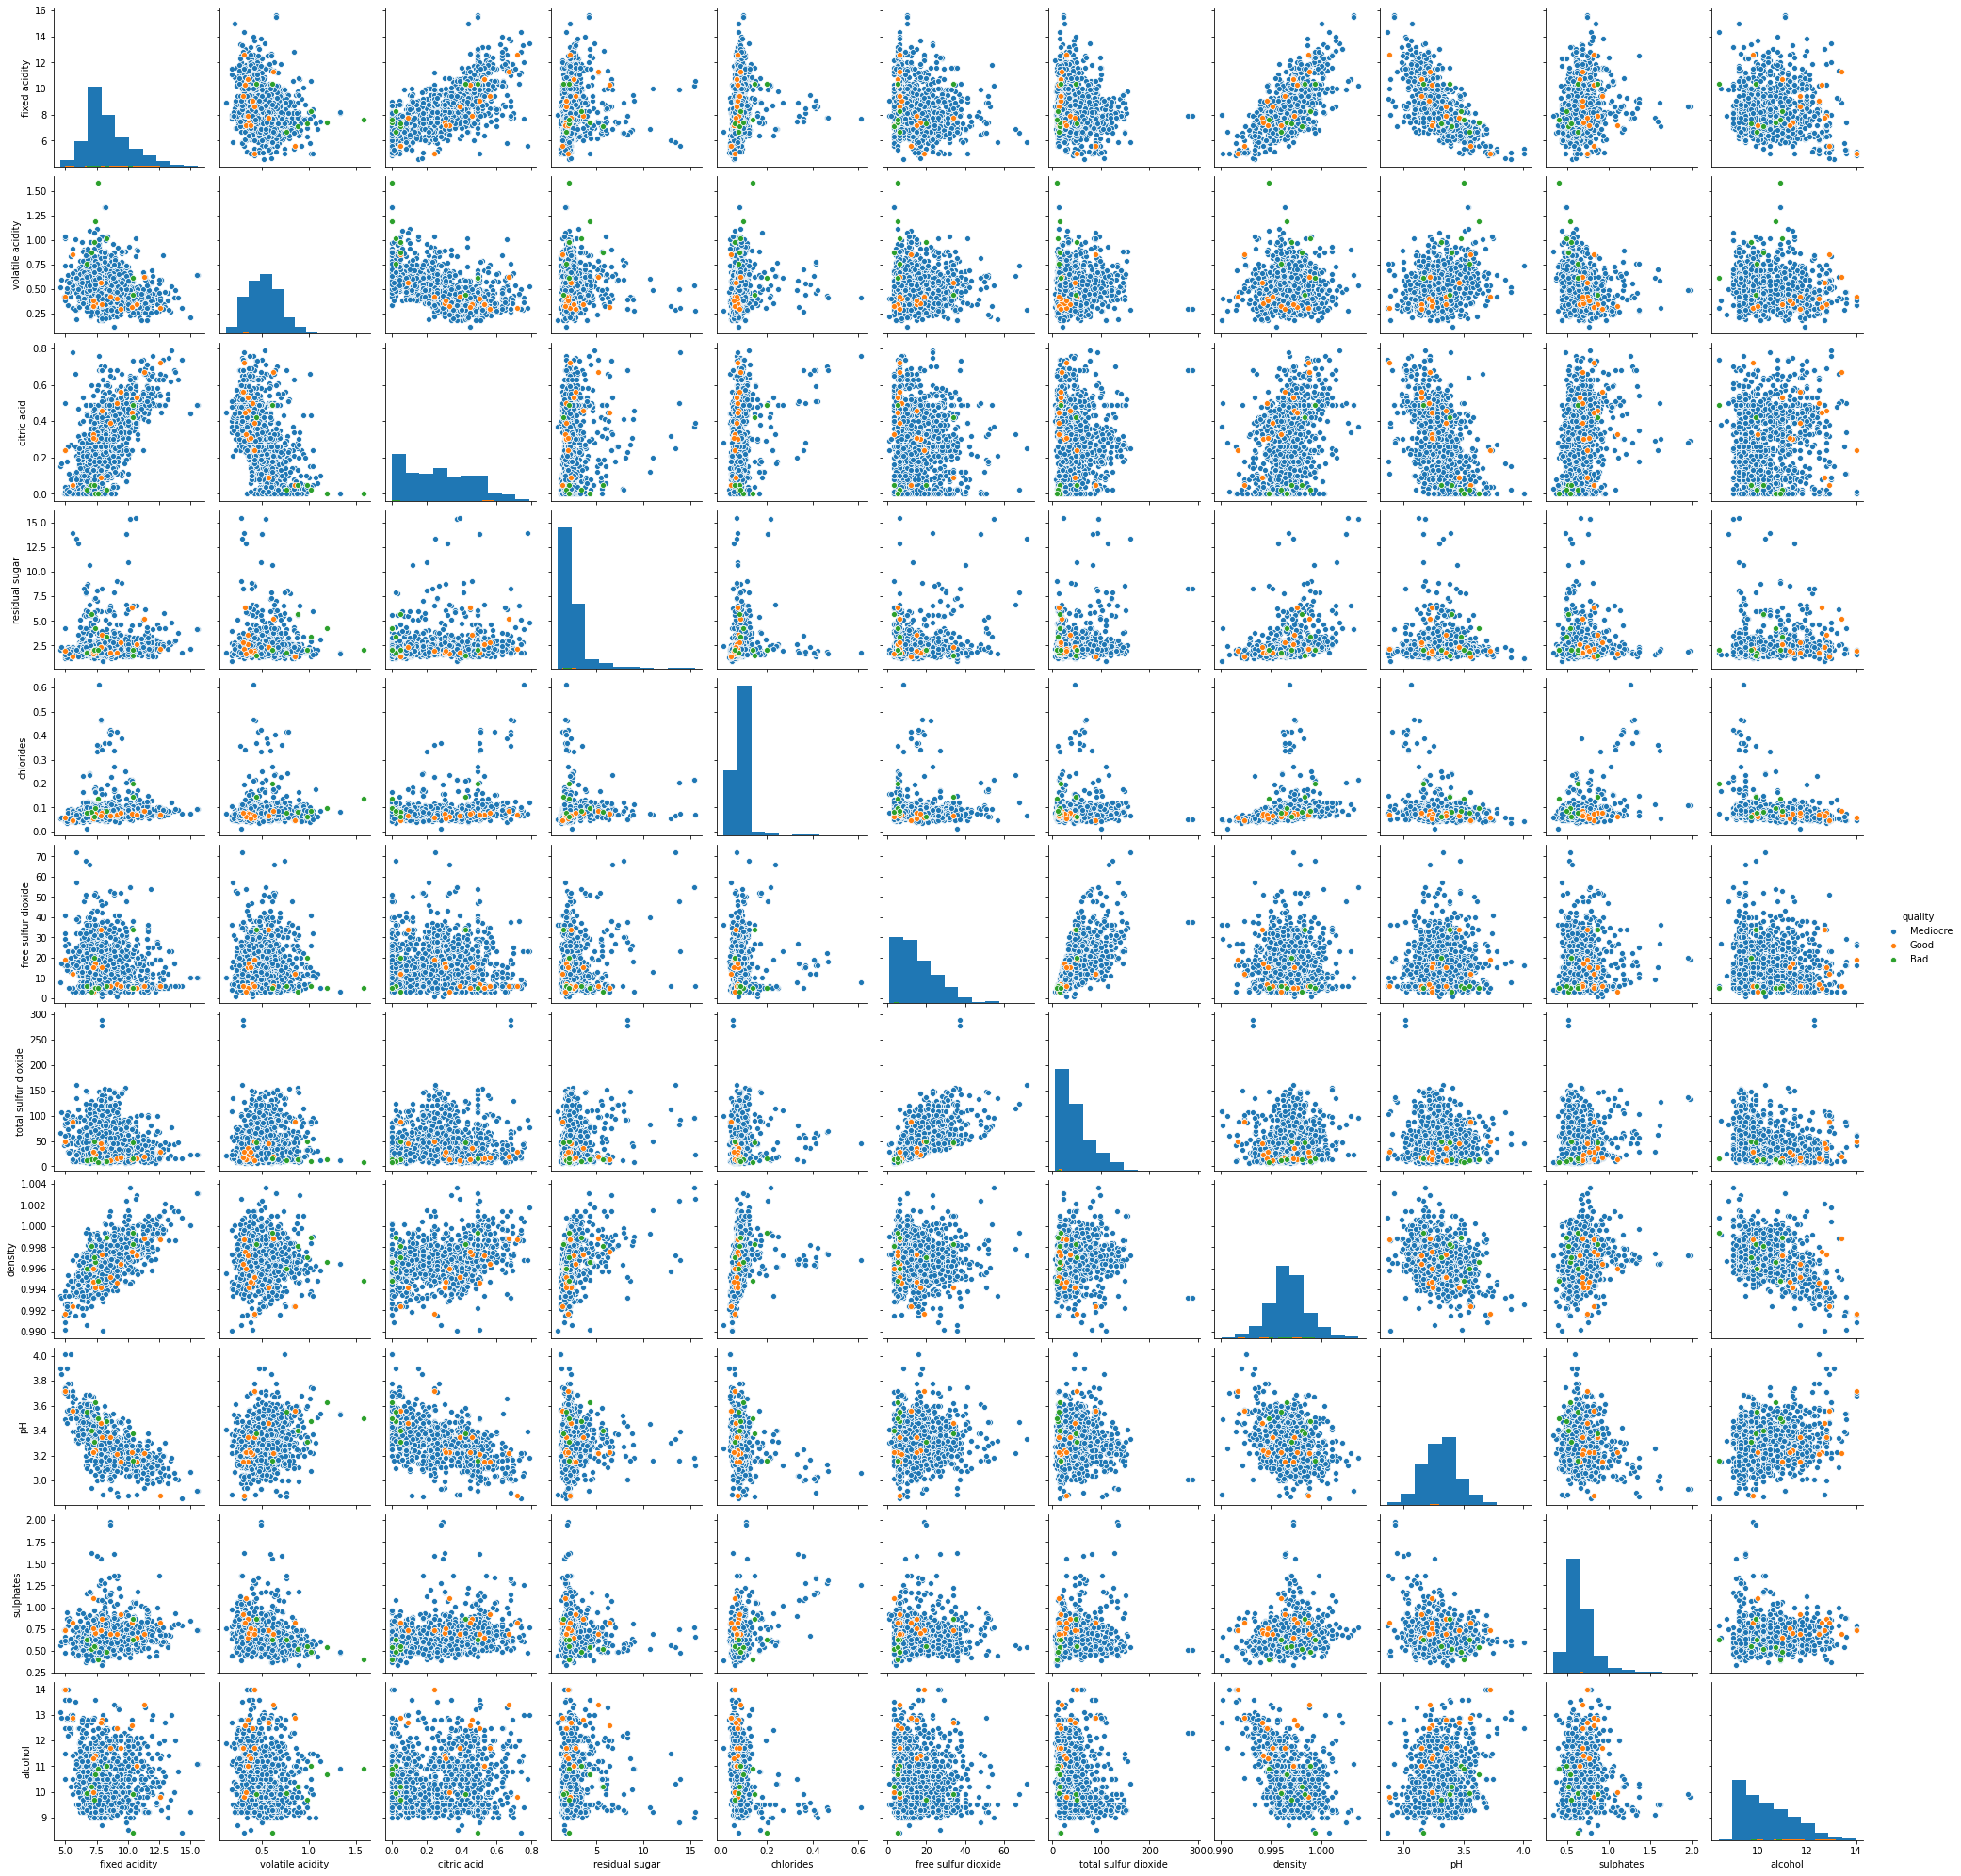

In [104]:
sns.pairplot(tmp, hue='quality', diag_kind='hist')